<a href="https://colab.research.google.com/github/gilbert83416/NTUT_Final_Project/blob/main/NTUT_HousePrice_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from urllib.request import urlretrieve
url = 'https://raw.githubusercontent.com/gilbert83416/NTUT_Final_Project/main/0424.csv'
urlretrieve(url, "0424.csv")

('0424.csv', <http.client.HTTPMessage at 0x7fcfb5570090>)

In [31]:
import pandas as pd
# 刪除第0列(英文，非資料)
data = pd.read_csv("0424.csv", encoding = "utf-8")
data

,Unnamed: 0,土地區段位置建物區段門牌,土地移轉總面積平方公尺,總樓層數,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,總價元,單價元平方公尺,編號,交易筆棟數-土地,交易筆棟數-建物,交易筆棟數-車位,交易年份,單價元/坪,土地移轉總面積坪,建物移轉總面積坪,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_松山區,鄉鎮市區_萬華區,建物型態_住宅大樓(11層含以上有電梯),建物型態_公寓(5樓含以下無電梯),建物型態_套房(1房1廳1衛),建物型態_華廈(10層含以下有電梯),建物型態_透天厝
0,0,臺北市文山區木新路三段211~240號,40.75,4.0,4,35,109.36,4,0,4,0,11850000,108358,RPWOMLMKJIOFFAA87CA,1,1,0,108,3.334092e+05,125.384615,336.492308,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,臺北市文山區福興路78巷20弄31~60號,33.81,5.0,4,41,109.42,3,2,2,0,10000000,91391,RPRNMLNKJIOFFAA37CA,2,1,0,108,2.812031e+05,104.030769,336.676923,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,臺北市文山區忠順街一段10巷1~30號,32.19,11.0,4,26,163.53,3,2,2,1,21000000,128417,RPVNMLNKJIOFFAA77CA,1,1,1,108,3.951292e+05,99.046154,503.169231,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,3,臺北市文山區萬壽路25巷1~30號,60.25,10.0,4,2,204.79,3,2,3,1,67203400,328158,RPUOMLOKJIOFFAA87CA,1,1,0,108,1.009717e+06,185.384615,630.123077,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4,臺北市中正區?m門街61~90號,10.65,12.0,4,3,88.70,2,1,1,1,18250000,205750,RPTNMLPKJIOFFAA77CA,2,1,0,108,6.330769e+05,32.769231,272.923077,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21272,21272,珠海路91~120號,68.46,5.0,4,12,189.69,4,2,2,0,23880000,133733,RPUNMLSJKIPFFEA88EA,1,1,1,109,4.114862e+05,210.646154,583.661538,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
21273,21273,安和路一段102巷1~30號,26.22,7.0,4,39,138.28,3,3,2,0,39120000,282904,RPWOMLRKJIPFFFA56EA,1,1,0,109,8.704738e+05,80.676923,425.476923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
21274,21274,信義路三段181~210號,6.14,12.0,4,33,77.09,1,1,1,1,21680000,281230,RPXOMLRKJIPFFFA66EA,1,1,0,109,8.653231e+05,18.892308,237.200000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
21275,21275,信義路三段134巷45弄1~30號,36.80,7.0,4,35,151.52,3,2,2,1,33500000,221093,RPOPMLRKJIPFFFA48EA,2,1,0,109,6.802862e+05,113.230769,466.215385,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [32]:
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['土地區段位置建物區段門牌'], axis=1)
data = data.drop(['編號'], axis=1)
data = data.drop(['總價元'], axis=1)
data = data.drop(['土地移轉總面積平方公尺'], axis=1)
data = data.drop(['建物移轉總面積平方公尺'], axis=1)
data = data.drop(['單價元平方公尺'], axis=1)
data

,總樓層數,主要建材,建築完成年月,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,交易筆棟數-土地,交易筆棟數-建物,交易筆棟數-車位,交易年份,單價元/坪,土地移轉總面積坪,建物移轉總面積坪,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_松山區,鄉鎮市區_萬華區,建物型態_住宅大樓(11層含以上有電梯),建物型態_公寓(5樓含以下無電梯),建物型態_套房(1房1廳1衛),建物型態_華廈(10層含以下有電梯),建物型態_透天厝
0,4.0,4,35,4,0,4,0,1,1,0,108,3.334092e+05,125.384615,336.492308,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,5.0,4,41,3,2,2,0,2,1,0,108,2.812031e+05,104.030769,336.676923,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,11.0,4,26,3,2,2,1,1,1,1,108,3.951292e+05,99.046154,503.169231,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,10.0,4,2,3,2,3,1,1,1,0,108,1.009717e+06,185.384615,630.123077,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,12.0,4,3,2,1,1,1,2,1,0,108,6.330769e+05,32.769231,272.923077,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21272,5.0,4,12,4,2,2,0,1,1,1,109,4.114862e+05,210.646154,583.661538,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
21273,7.0,4,39,3,3,2,0,1,1,0,109,8.704738e+05,80.676923,425.476923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
21274,12.0,4,33,1,1,1,1,1,1,0,109,8.653231e+05,18.892308,237.200000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
21275,7.0,4,35,3,2,2,1,2,1,0,109,6.802862e+05,113.230769,466.215385,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [33]:
s = data.isnull().sum()
s[s>0].sort_values(ascending = False)
print(list(data.columns))

['總樓層數', '主要建材', '建築完成年月', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '有無管理組織', '交易筆棟數-土地', '交易筆棟數-建物', '交易筆棟數-車位', '交易年份', '單價元/坪', '土地移轉總面積坪', '建物移轉總面積坪', '鄉鎮市區_中山區', '鄉鎮市區_中正區', '鄉鎮市區_信義區', '鄉鎮市區_內湖區', '鄉鎮市區_北投區', '鄉鎮市區_南港區', '鄉鎮市區_士林區', '鄉鎮市區_大同區', '鄉鎮市區_大安區', '鄉鎮市區_文山區', '鄉鎮市區_松山區', '鄉鎮市區_萬華區', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_公寓(5樓含以下無電梯)', '建物型態_套房(1房1廳1衛)', '建物型態_華廈(10層含以下有電梯)', '建物型態_透天厝']


In [34]:
data["總樓層數"] = data["總樓層數"].fillna('1')
s = data.isnull().sum()
s[s>0].sort_values(ascending = False)

Series([], dtype: int64)

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
# [題目90, 題目10, 答案90, 答案10]
x_train, x_test, y_train, y_test = train_test_split(np.array(data.values),
                             np.array(data['單價元/坪']),
                             test_size=0.2)

In [36]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(1395.0, 2446.2, 'price per ping <= 644593.844\nmse = 65635436759.525\nsamples = 17021\nvalue = 569951.325'),
 Text(697.5, 1902.6, 'price per ping <= 441684.609\nmse = 13890192202.527\nsamples = 11962\nvalue = 460609.404'),
 Text(348.75, 1359.0, 'price per ping <= 307615.391\nmse = 6749091772.994\nsamples = 4823\nvalue = 344069.356'),
 Text(174.375, 815.3999999999999, 'price per ping <= 201593.844\nmse = 4665195360.92\nsamples = 1261\nvalue = 231268.085'),
 Text(87.1875, 271.7999999999997, '\n  (...)  \n'),
 Text(261.5625, 271.7999999999997, '\n  (...)  \n'),
 Text(523.125, 815.3999999999999, 'price per ping <= 379896.922\nmse = 1387626725.642\nsamples = 3562\nvalue = 384002.653'),
 Text(435.9375, 271.7999999999997, '\n  (...)  \n'),
 Text(610.3125, 271.7999999999997, '\n  (...)  \n'),
 Text(1046.25, 1359.0, 'price per ping <= 540870.75\nmse = 3340264132.118\nsamples = 7139\nvalue = 539342.091'),
 Text(871.875, 815.3999999999999, 'price per ping <= 490798.469\nmse = 786308133.234\

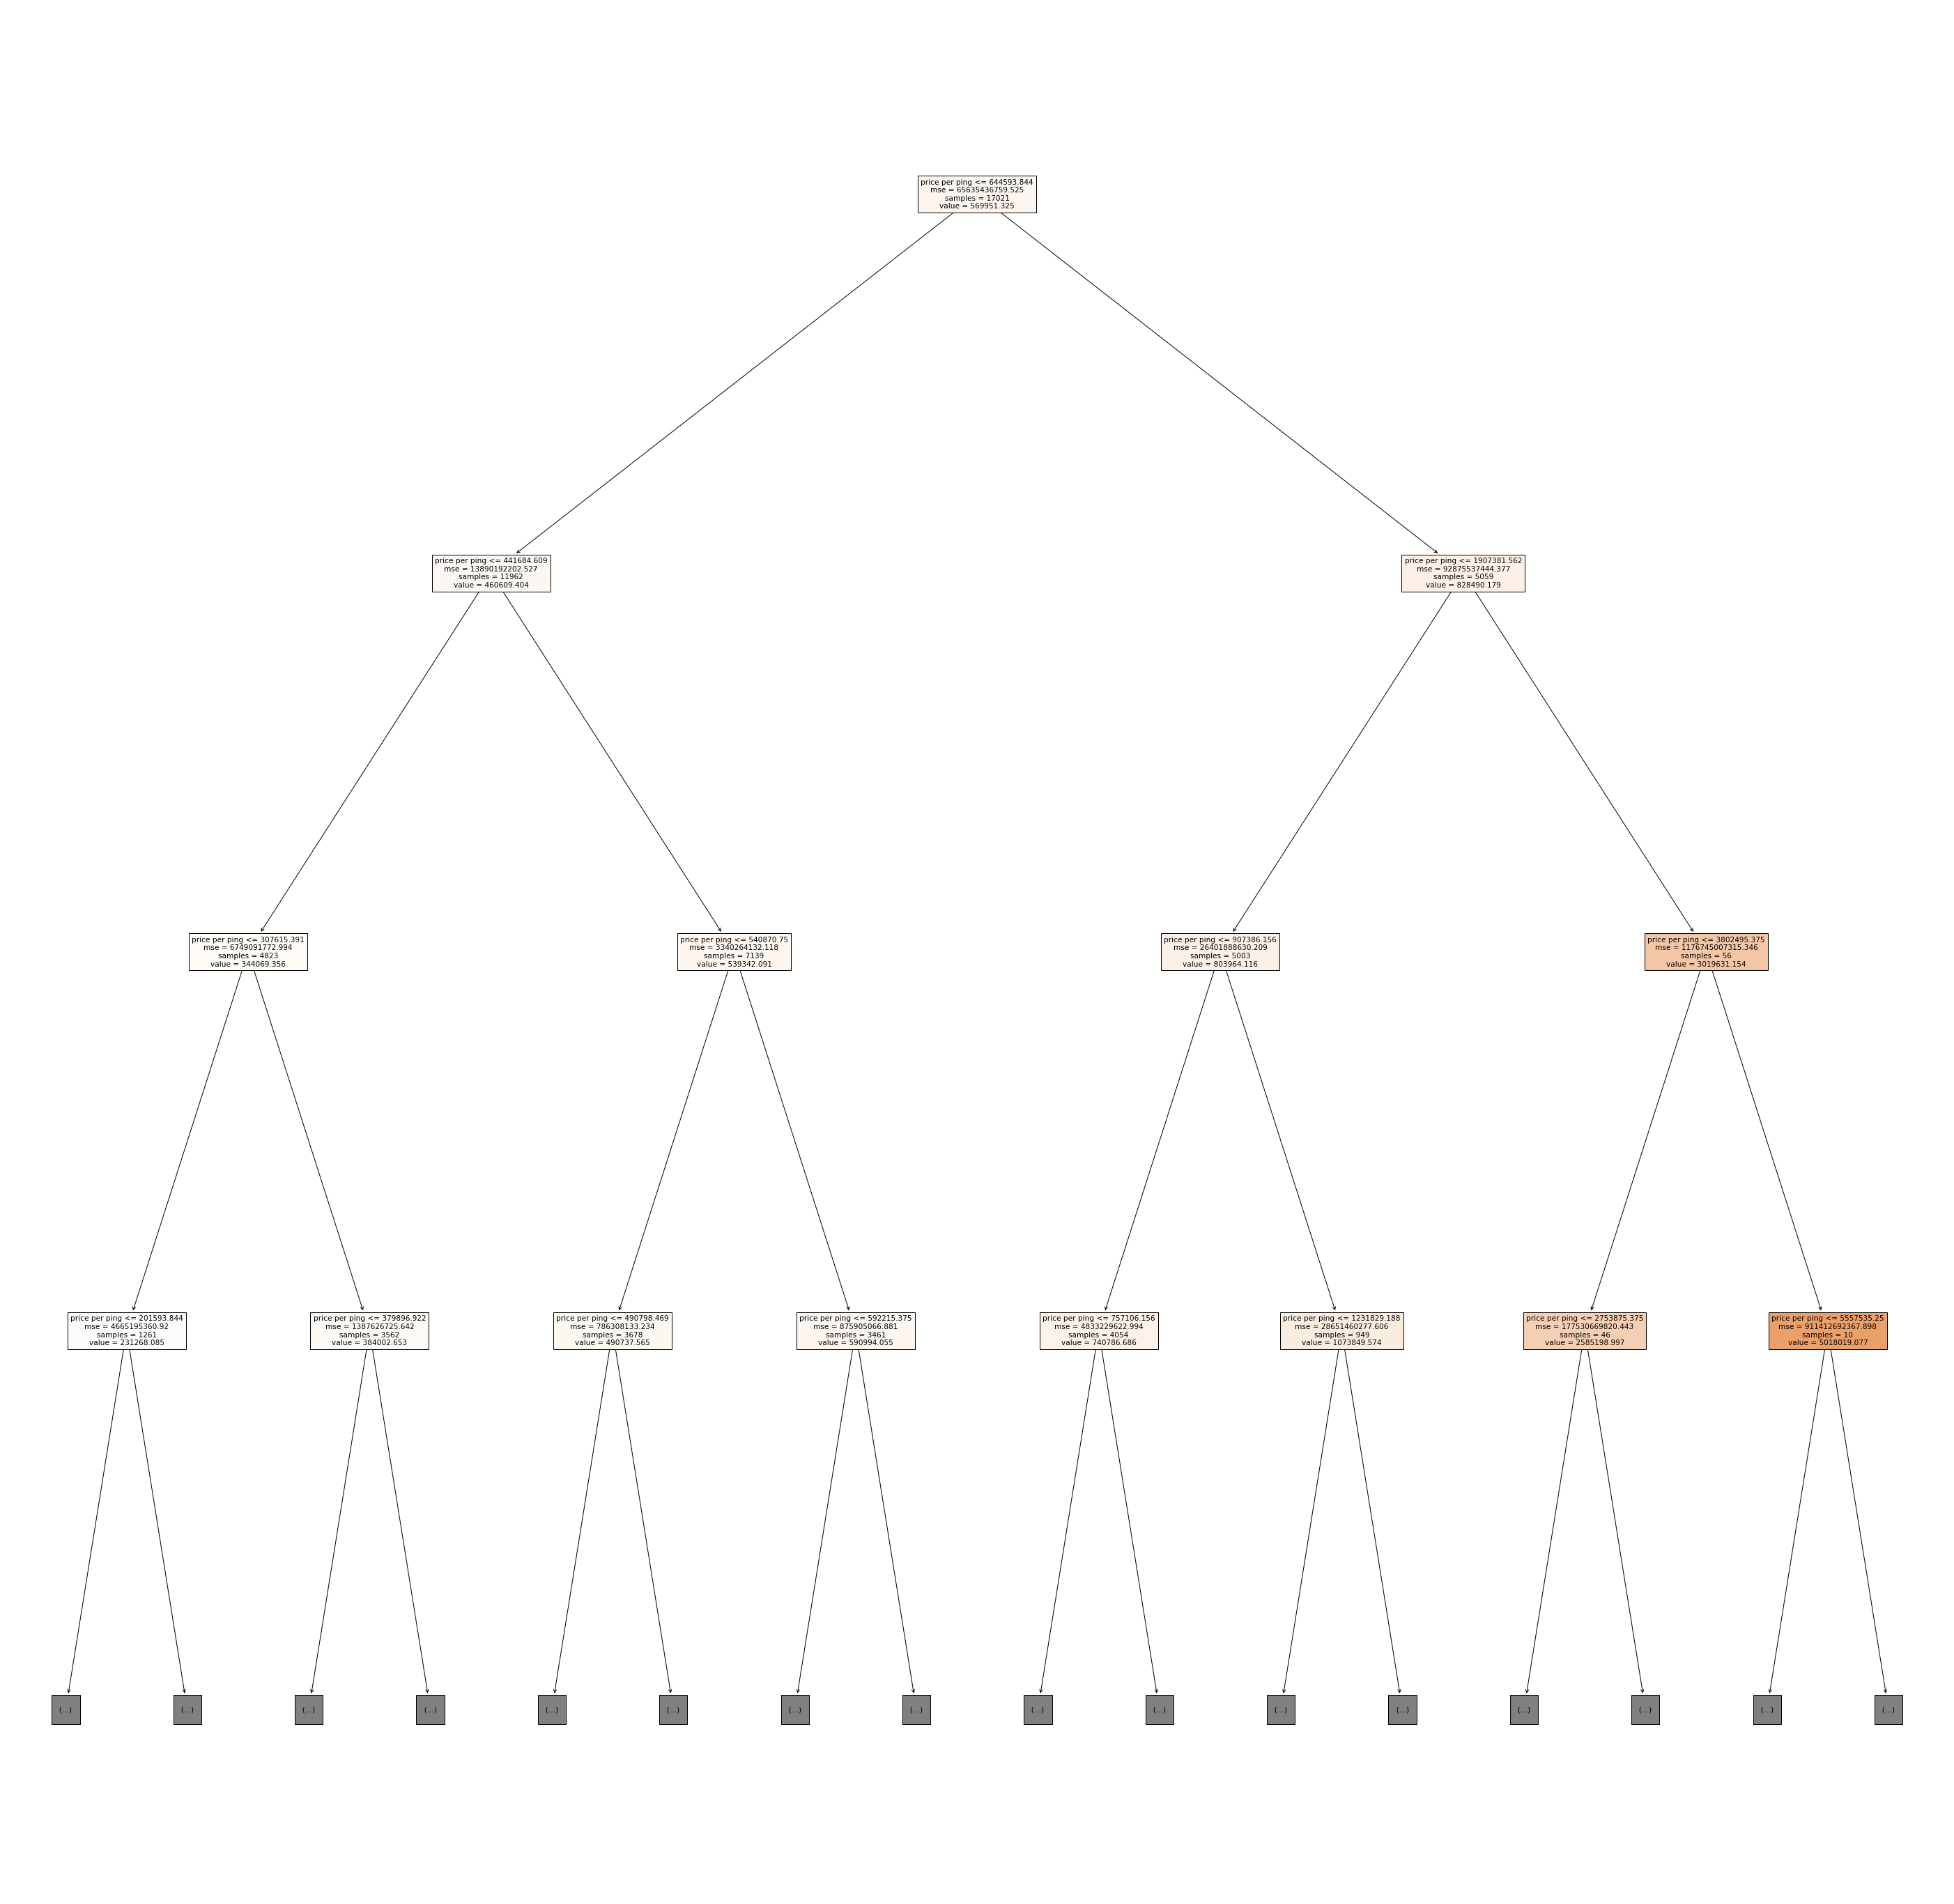

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 50))
names = ['Total number of floors', 'Building Materials', 'Age of House', 'Room', 'hall', 'bathroom', 'Management Committee', 'number of Land', 'number of house', 'number of parking', 'Transaction year', 'price per ping', 'Total area of ​​land transferred per ping', 'Total area of ​​buildings transferred ping', 'district_Zhongshan', 'district_Zhongzheng', 'district_Xinyi', 'district_Neihu', 'district_Beitou', 'district_Nangang', 'district_Shilin', 'district_Datong', 'district_Daan', 'district_Wenshan', 'district_Songshan', 'district_Wanhua', 'Apartment(over 11 floor with elevator)', 'Apartment(without elevator)', 'Suite', 'Apartment(below 10 floor with elevator)', 'House']
plot_tree(reg, feature_names=names, max_depth= 3, filled=True)

In [39]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.9732497779649576